In [133]:
description = """
09/24/2018

Over the past weekend Stefan and Sheila turned down the CO2 laser which made some higher order modes disappear 
from the antisymmetric port.  These higher order modes showed up with a particular CO2 power which made it resonate,
what is odd is that the occurence happened when bringing the arms into resonance from the CARM reduction.

The goal of this code is to use Finesse to map out the HOM resonances in the power recycling cavity and then see
how the thermal lens varies the round trip gouy phase.
"""

In [134]:
import pykat
import numpy as np
import matplotlib.pyplot as pl

%matplotlib inline

In [135]:
#Load ALIGO design
katfile = "design_with_IMC_HAM2_FI_OMC.kat"

basekat = pykat.finesse.kat() 
basekat.load(katfile)
basekat.parse('xaxis PRM phi lin 0 360 1000 ')
basekat.parse('yaxis re:im')

In [144]:
#Turn off all cavity commands so I don't get confused
for cav in basekat.getAll(pykat.commands.cavity):
    cav.enabled = False

In [148]:
kat_PRCx = basekat.deepcopy()
kat_PRCx.cavPRX.enabled=True
kat_PRCx.cavPRY.enabled=True
kat_PRCx.parse("bp prx_qx x q nPRM2")
kat_PRCx.parse("cp cavPRX x length")
kat_PRCx.parse("pd0 PRC_buildup nPRM2")
kat_PRCx.parse('cp cavPRX x finesse')

f = kat_PRCx.run()

--------------------------------------------------------------
Running kat - Started at 2018-09-25 15:56:56.637171


 87% | ETA:  0:00:00 | Calculating                                             


Finished in 0.731076 seconds


100% | ETA:  0:00:00 | Calculating                                             

In [149]:
q_prx = pykat.BeamParam(q=f['prx_qx'][0])

c = 3.0e8

print(q_prx.w*1000.0)

print((q_prx.gouy()*180./np.pi)/2.0)

print((f['cavPRX_x_length'][0]/2))

L = f['cavPRX_x_length'][0]

print((c/(L))*1e-6)

print(f['cavPRX_x_finesse'][0])

2.255057280010371
34.46698392980284
(57.696015846975+0j)
(2.5998328965701796+0j)
(4.19671420018004+0j)


C:\Users\tvo88\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\tvo88\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


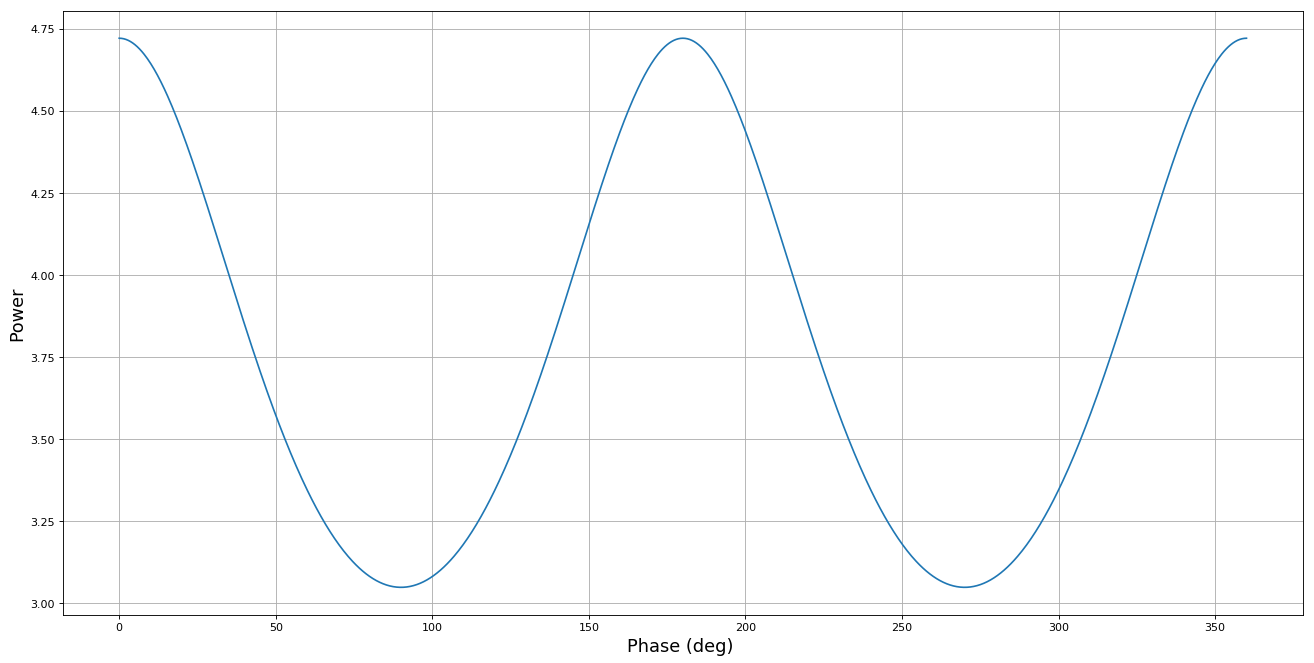

In [150]:
pl.figure(figsize=(20, 10), dpi=80)

############################
pl.subplot(111)

pl.plot(f.x,f['PRC_buildup'])

pl.ylabel("Power",fontsize=16)
pl.xlabel("Phase (deg) ",fontsize=16)
pl.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
pl.grid()
pl.legend()